# **1. Regresión Logística sin Regularización**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd #pd solo es el alias
import os #operating system
print("Current Working Directory " , os.getcwd())
data = pd.read_csv('ex2data1.txt')
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /home/Alejandra/Documents/Machine-Learning/Laboratorio 2


,exam1_score,exam2_score,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Extraemos las columnas de características y guardamos en la variable `X`

In [3]:
X = data[['exam1_score','exam2_score']]
X.head()

,exam1_score,exam2_score
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [4]:
y = data[['decision']]
y.head()
#type(y.shape)
#y.values.ravel()
#type(y.shape)

,decision
0,0
1,0
2,0
3,1
4,1


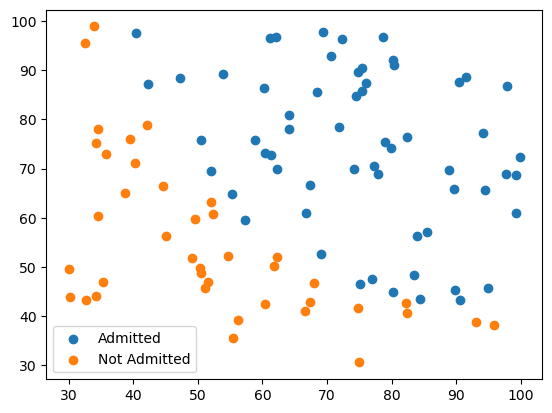

In [5]:
import matplotlib.pyplot as plt

X_admitted = X[y['decision']==1] 
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')

X_Not_admitted = X[y['decision']==0] 
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
classifier = LogisticRegression(penalty='none').fit(X, y) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt
xnew = np.array([[45, 85], [50, 99]])
proba = classifier.predict_proba(xnew)
print(proba)

[[0.22370987 0.77629013]
 [0.00608428 0.99391572]]


In [7]:
accuracy = classifier.score(X,y) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.89


Parámetros theta sin theta_0(bias):
[[0.20623222 0.20147191]]
bias (theta_0):
[-25.16138567]


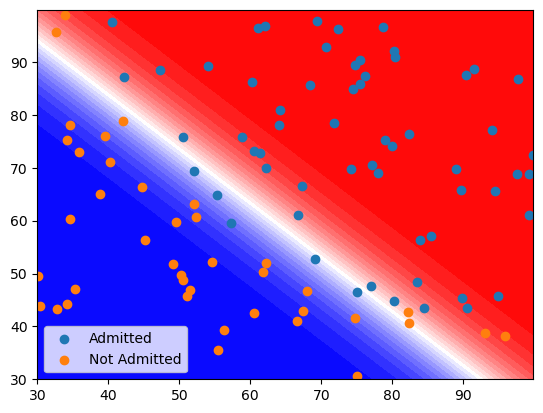

In [8]:
theta = classifier.coef_ #theta_1, theta_2, etc..
bias = classifier.intercept_ #bias-> theta_0
print('Parámetros theta sin theta_0(bias):')
print(theta) #parámetros theta (sin el bias)
print('bias (theta_0):')
print(bias)

import matplotlib.pyplot as plt

xx, yy = np.mgrid[30:100:.1, 30:100:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['decision']==1] 
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')
X_Not_admitted = X[y['decision']==0] 
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

# **2. Regresión Logística Regularizada**


In [9]:
import pandas as pd
import os
print("Current Working Directory " , os. getcwd())
data = pd.read_csv('ex2data2.txt')
print(data.shape)
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /home/Alejandra/Documents/Machine-Learning/Laboratorio 2
(118, 3)


,test1,test2,QA
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [10]:
X = data[['test1','test2']]
print(X.shape)
X.head()

(118, 2)


,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [11]:
y = data[['QA']]
y.head()

,QA
0,1
1,1
2,1
3,1
4,1


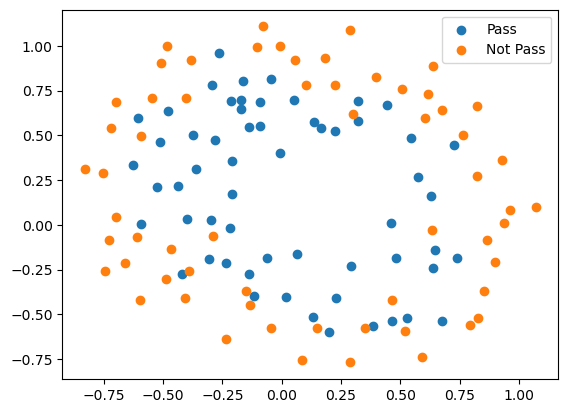

In [12]:
import matplotlib.pyplot as plt

X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')

X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15) # x1*x2, x1*x2^2, ....x1^14*x2, degree es un hyperparameter
X_pol = poly.fit_transform(X)
print(np.shape(X_pol))


(118, 136)


In [14]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 100 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
classifier.predict_proba(poly.transform(xnew))


array([[0.50174447, 0.49825553],
       [0.48914814, 0.51085186]])

In [15]:
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print(accuracy)

proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred))

0.6610169491525424
0.6610169491525424


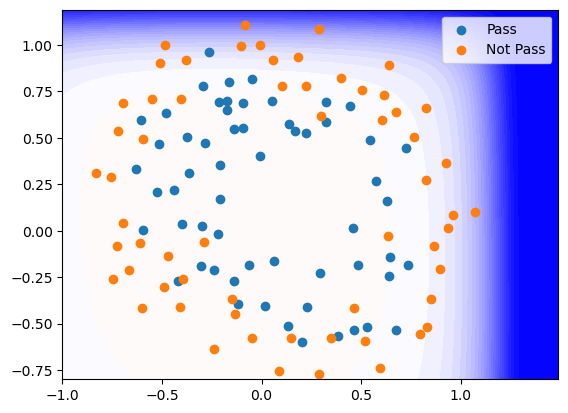

In [16]:
import matplotlib.pyplot as plt

xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

## **Actividad 1**

En esta parte del ejercicio, podrá probar diferentes parámetros de regularización para el conjunto de datos para comprender cómo la regularización evita el sobreajuste.

Observe los cambios en la frontera de decisión a medida que varía λ. Analice
al menos los siguientes valores del parámetro de regularización, i.e., λ = 0.001, 
λ =1, λ = 10, λ = 100 y discuta sus resultados en términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento.
Obtenga y discuta los resultados del análisis pedido.

Lambda:  1e-06  accuracy: 0.940677966101695 ,  0.940677966101695
Lambda:  1e-05  accuracy: 0.8983050847457628 ,  0.8983050847457628
Lambda:  0.0001  accuracy: 0.8898305084745762 ,  0.8898305084745762
Lambda:  0.001  accuracy: 0.8813559322033898 ,  0.8813559322033898
Lambda:  0.01  accuracy: 0.847457627118644 ,  0.847457627118644
Lambda:  0.1  accuracy: 0.8559322033898306 ,  0.8559322033898306
Lambda:  1.0  accuracy: 0.8305084745762712 ,  0.8305084745762712
Lambda:  10.0  accuracy: 0.7203389830508474 ,  0.7203389830508474
Lambda:  100.0  accuracy: 0.6610169491525424 ,  0.6610169491525424


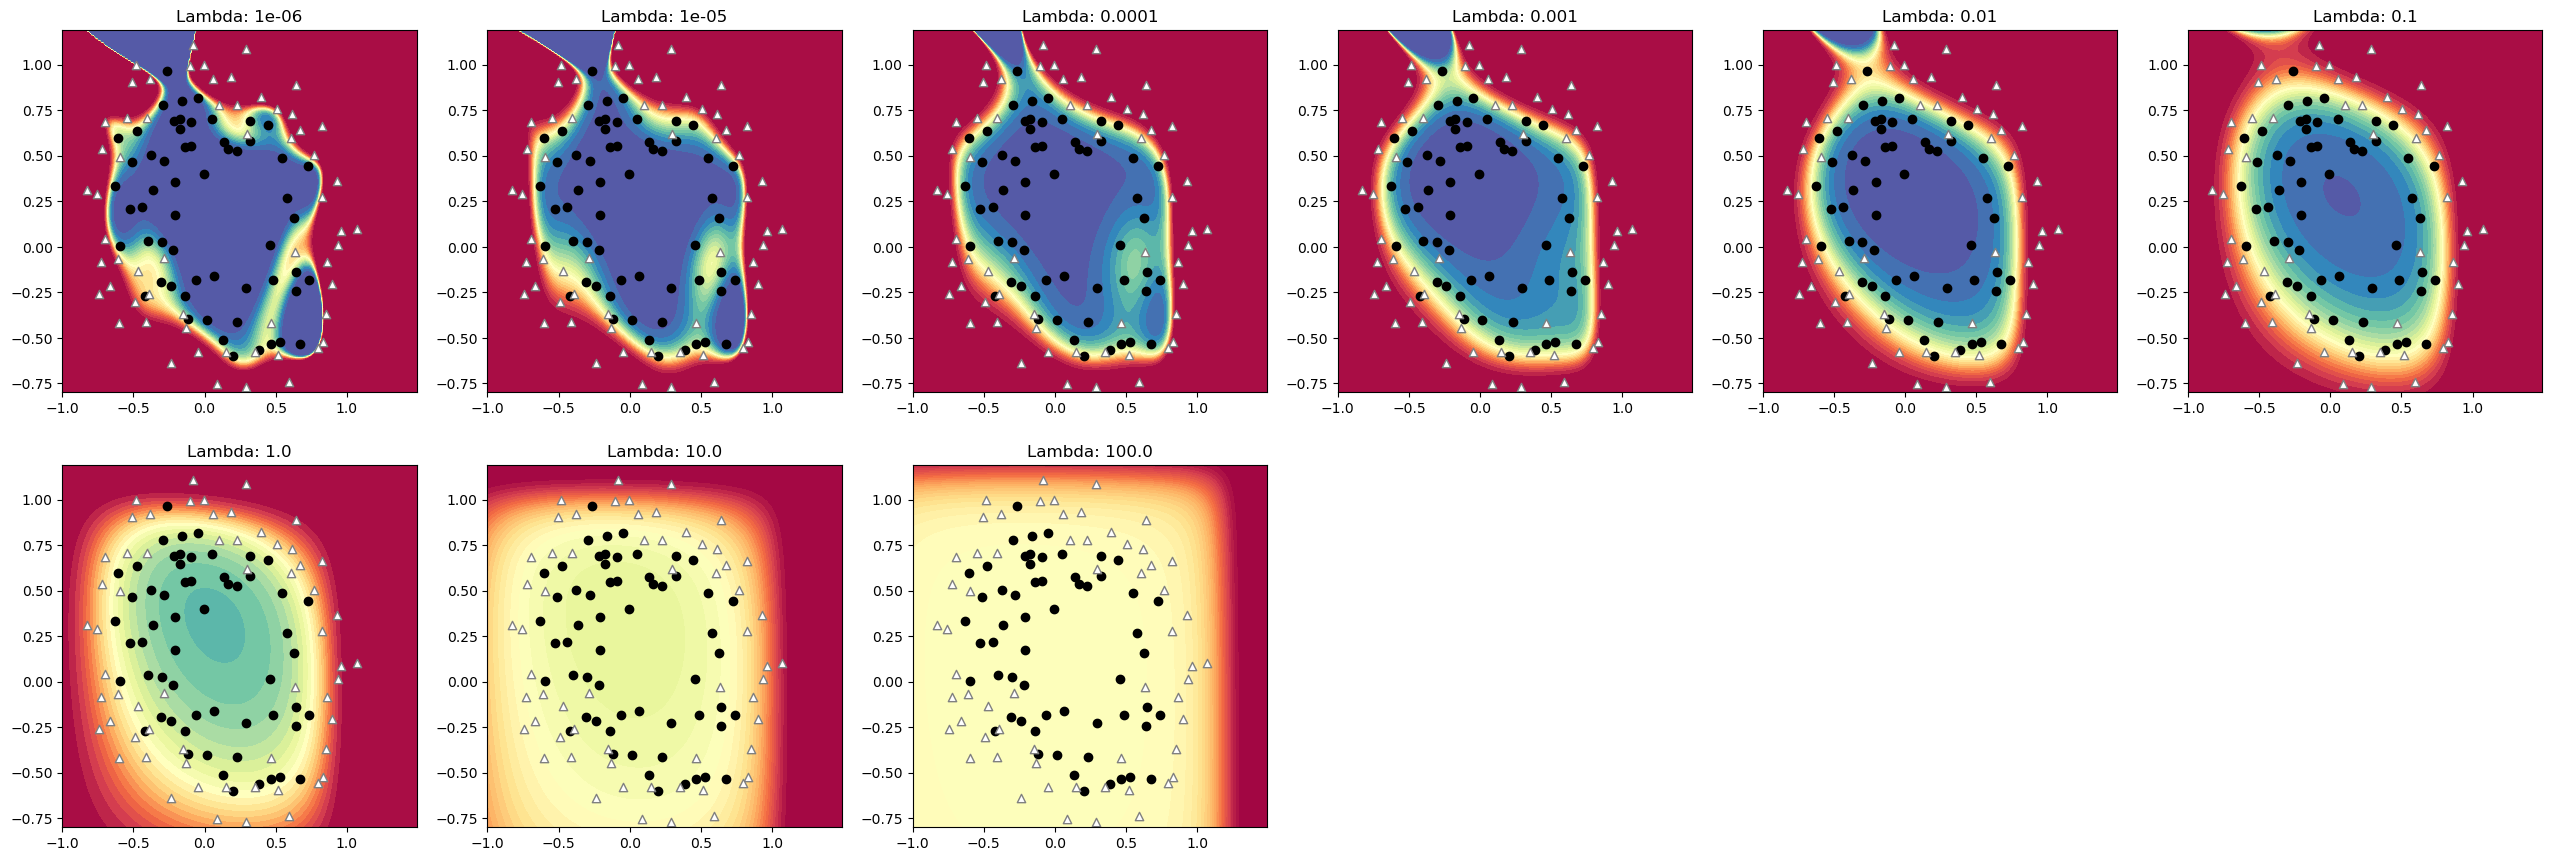

In [17]:
plt.figure(figsize=(4*8, 2*8))

for j in range(0,9):

    poly = PolynomialFeatures(degree=15)
    X_pol = poly.fit_transform(X)

    lambda_value = round(0.000001 * pow(10,j), 9) #hyperparameter 

    classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
    xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
    classifier.predict_proba(poly.transform(xnew))
    accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%

    proba = classifier.predict_proba(poly.transform(X))
    ypred = proba[:,1]>0.5 #umbral 

    print("Lambda: ", lambda_value," accuracy:",accuracy,", ", accuracy_score(y,ypred))

    title = "Lambda: "
    title += str(lambda_value)

    subplot=plt.subplot(3, 6, (j)+1)
    subplot.set_title(title)
    xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
    plt.contourf(xx, yy, probs, 25, cmap='Spectral', vmin=0, vmax=1)
    X_admitted = X[y['QA']==1] 
    plt.scatter(X_admitted['test1'], X_admitted['test2'], c ="black")
    X_Not_admitted = X[y['QA']==0] 
    plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], c ="white", marker ="^", edgecolors='grey')

plt.show()


### Análisis

A medida que decrece los valores del hiperparámetro (llegando a 0 casi) se puede apreciar que el accuracy es mas alto y que hay overfitting, un modelo muy ajustado a los datos de prueba. Aunque se obtuvo un resultado alto de accuracy lo mas probable es que con un outlier el modelo no se ajuste bien luego. Por el contrario si el valor del hiperparametro incrementa se observa un acurracy menor y un modelo con underfitting. 

# **3. "Churn" en operadoras telefónicas**.


Para esta parte del laboratorio, Vamos a usar el dataset disponible en [link text](https://www.kaggle.com/mnassrib/telecom-churn-datasets)

Este dataset está compuesto de datos de la actividad de clientes de una operadora de telefonía. La columna `Churn` es la etiqueta o salida que se desea predecir. Cuando "Churn" es 1 significa que el cliente cambió de operadora. El objetivo es predecir si un cliente cambiará de operadora usando Regresión Logística.

Este dataset contiene dos conjuntos: un conjunto de entrenamiento en el archivo `churn-bigml-80.csv` y un conjunto de test en el archivo `churn-bigml-20.csv`

Primero vamos a leer el conjunto de entrenamiento y limpiarlo para obtener 18 características. También vamos a crear características polinómicas hasta orden 3 y posteriormente normalizaremos los datos. La normalización es necesaria porque las escalas de las características polinómicas es mucho mayor que las características originales.

Luego de este proceso, nuestro conjunto de entrenamiento tendrá 2666 ejemplos con 1330 características. Recuerde que la salida es la columna `Churn`.

In [18]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
DataSet = pd.read_csv('churn-bigml-80.csv') #set de entrenamiento

#limpieza de los datos
DataSet = DataSet.drop(columns=["State"])
DataSet['Churn'] = DataSet['Churn'].replace([False],0)
DataSet['Churn'] = DataSet['Churn'].replace([True],1)
DataSet['International plan'] = DataSet['International plan'].map({'Yes': 1, 'No': 0})
DataSet['Voice mail plan'] = DataSet['Voice mail plan'].map({'Yes': 1, 'No': 0})

Xtrain = DataSet.drop(columns=['Churn'])
ytrain = DataSet['Churn']

print("Tamaño del dataset de entrenamiento original", Xtrain.shape)

poly = PolynomialFeatures(degree=3)
Xtrain_pol = poly.fit_transform(Xtrain)

scaler = preprocessing.StandardScaler().fit(Xtrain_pol) #media cero, varianza 1
Xtrain_pol_norm = scaler.transform(Xtrain_pol)

print("Tamaño del dataset de entrenamiento con características polinómicas", Xtrain_pol.shape)

Tamaño del dataset de entrenamiento original (2666, 18)
Tamaño del dataset de entrenamiento con características polinómicas (2666, 1330)


A continuación leeremos el conjunto de test y aplicaremos las mismas transformaciones usadas en el conjunto de entrenamiento: creación de características polinómicas y normalización.

In [19]:
Dataset_test = pd.read_csv('churn-bigml-20.csv')
Dataset_test = Dataset_test.drop(columns=["State"])
Dataset_test['Churn'] = Dataset_test['Churn'].replace([False],0)
Dataset_test['Churn'] = Dataset_test['Churn'].replace([True],1)
Dataset_test['International plan'] = Dataset_test['International plan'].map({'Yes': 1, 'No': 0})
Dataset_test['Voice mail plan'] = Dataset_test['Voice mail plan'].map({'Yes': 1, 'No': 0})

Xtest = Dataset_test.drop(columns=['Churn'])
ytest = Dataset_test['Churn']

Xtest_pol_norm = scaler.transform(poly.transform(Xtest))
print ("Tamaño del dataset de test con características polinómicas", Xtest_pol_norm.shape)

Tamaño del dataset de test con características polinómicas (667, 1330)


## **Actividad 2**

A partir del siguiente código base, cree un clasificador binario con regresión logística sin regularización. Reporte el valor de la exactitud en el conjunto de test (ver variable `accuracy_test`). Para asegurar que su clasificador tenga convergencia use `max_iter=10000` en los parámetros de la función de regresión logística,


In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#entreno en churn-bigml-80.csv, pruebo (test) churn-bigml-20.csv
''' Hey '''
classifier = LogisticRegression(penalty = 'none', max_iter=10000).fit(Xtrain_pol_norm, ytrain) 

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.863568215892054


## **Actividad 3**

A partir del siguiente código base, cree un clasificador binario con regresión logística con regularización (el factor de regularización es la variable `lambda_value`). Reporte el valor de la exactitud en el conjunto de test (ver variable `accuracy_test`) para los siguientes valores de lambda: 1, 10, 100, 1000, 10000. Para asegurar que su clasificador tenga convergencia use `max_iter=10000` en los parámetros de la función de regresión logística,

In [21]:
from sklearn.linear_model import LogisticRegression
import numpy as np

for i in range(0,5):
    lambda_value = 1 * pow(10,i)
    classifier = LogisticRegression(penalty='l2', C = 1/lambda_value, max_iter = 10000).fit(Xtrain_pol_norm, ytrain)

    accuracy_test = classifier.score(Xtest_pol_norm,ytest)
    print("Lambda", lambda_value, "con exactitud en el conjunto de test:", accuracy_test)

Lambda 1 con exactitud en el conjunto de test: 0.9250374812593704
Lambda 10 con exactitud en el conjunto de test: 0.9190404797601199
Lambda 100 con exactitud en el conjunto de test: 0.9130434782608695
Lambda 1000 con exactitud en el conjunto de test: 0.8920539730134932
Lambda 10000 con exactitud en el conjunto de test: 0.8650674662668666


## **Actividad 4**

Cuál fue el mejor clasificador en términos de la exactitud en el conjunto de test? Discuta sus resultados.

Al comparar los entrenamientos con Regresión Logística Regularizada, se encontró que el entrenamiento con λ = 1 tuvo la mayor exactitud de 0.9250374812593704. A partir de este punto, la exactitud disminuyó a medida que se aumentaba el valor de λ, siendo el entrenamiento con λ = 10000 el que tuvo la menor exactitud con 0.8650674662668666. Esto confirma la teoría de que a medida que λ aumenta, se produce un underfitting en el entrenamiento, lo que provoca que la clasificación de los datos de prueba empeore. Por lo tanto, es importante escoger el valor adecuado de λ para obtener un mejor entrenamiento.

# **4. Conclusiones**
Concluya su trabajo con sus principales observaciones obtenidas de los resultados de sus experimentos


-El modelo de Regresión Logística se utiliza para clasificar datos en forma binaria. Esta clasificación puede ser regularizada o no regularizada. En el caso de la regularización, se aplica un hyperparámetro λ que controla el ajuste del modelo. Por otro lado, en la regresión logística no regularizada, el modelo se entrena solo con la función de costo sin ninguna penalización.

-En algunos experimentos realizados, se encontró que la Regresión Logística no Regularizada puede ser una solución adecuada para la clasificación de datos cuando se utiliza un modelo de clasificación sencillo. Sin embargo, para una muestra de datos en la que no se puede determinar el grado polinómico que rige la frontera de decisión, es necesario ajustar primero los datos polinómicamente y luego entrenar el modelo.

-Es posible polinomizar los datos mediante prueba y error para determinar el grado adecuado que permita la mejor probabilidad de clasificación.

-Es importante destacar que un valor de λ alto no garantiza un entrenamiento más preciso. Es necesario analizar cómo se comporta el modelo y en qué punto la precisión comienza a disminuir, lo que puede provocar un underfitting del modelo. Por otro lado, un valor de λ cero en un polinomio complejo produce un overfitting que no mejora la clasificación.

-Para obtener el mejor modelo de entrenamiento, se debe analizar cuidadosamente el problema de clasificación y elegir el modelo adecuado, ya sea regularizado o no, y usar la penalidad adecuada si se polinomizan los datos.